In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv("https://github.com/MaxWhyte/Data-Visualisation-Population-vs-Crime-rate-in-German-Cities/raw/master/party_in_nyc.csv") # or if locally: ("party_in_nyc.csv")

In [12]:
df.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [13]:
df.tail()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
99994,2016-06-24 00:25:55,2016-06-24 08:18:03,Residential Building/House,11226.0,BROOKLYN,BROOKLYN,40.646233,-73.958880
99995,2016-06-24 00:30:07,2016-06-24 01:35:26,Street/Sidewalk,11233.0,BROOKLYN,BROOKLYN,40.676121,-73.921837
99996,2016-06-24 00:30:59,2016-07-01 17:56:08,Street/Sidewalk,10456.0,BRONX,BRONX,40.834894,-73.911734
99997,2016-06-24 00:34:57,2016-06-24 09:35:07,Residential Building/House,10030.0,NEW YORK,MANHATTAN,40.820511,-73.939887
99998,2016-06-24 00:35:59,2016-06-24 01:43:53,Street/Sidewalk,11237.0,BROOKLYN,BROOKLYN,40.699494,-73.913399


In [14]:
df.describe()

,Incident Zip,Latitude,Longitude
count,99556.000000,99396.000000,99396.000000
mean,10695.754580,40.751829,-73.926525
std,589.740286,0.081419,0.061718
min,83.000000,40.500737,-74.251277
25%,10034.000000,40.686351,-73.958878
50%,10468.000000,40.742983,-73.930774
75%,11224.000000,40.829866,-73.896589
max,11694.000000,40.911189,-73.705673


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
Created Date     99999 non-null object
Closed Date      99652 non-null object
Location Type    99999 non-null object
Incident Zip     99556 non-null float64
City             99556 non-null object
Borough          99999 non-null object
Latitude         99396 non-null float64
Longitude        99396 non-null float64
dtypes: float64(3), object(5)
memory usage: 6.1+ MB


In [16]:
df.shape

(99999, 8)

# Let's find out which type of location is the most annoying one in our neighbourhood (causes the most calls)!

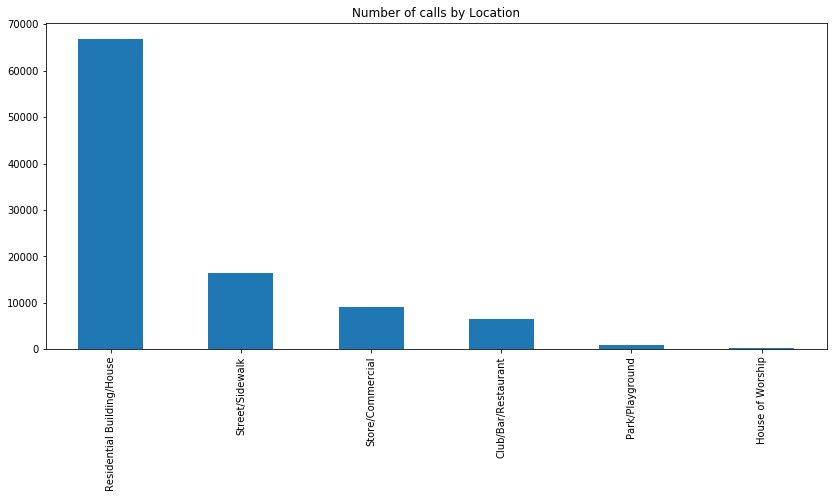

In [41]:
df["Location Type"].value_counts(ascending=False).plot(kind="bar", figsize=(14,6), title="Number of calls by Location")
plt.show()

# And in which district are most parties?

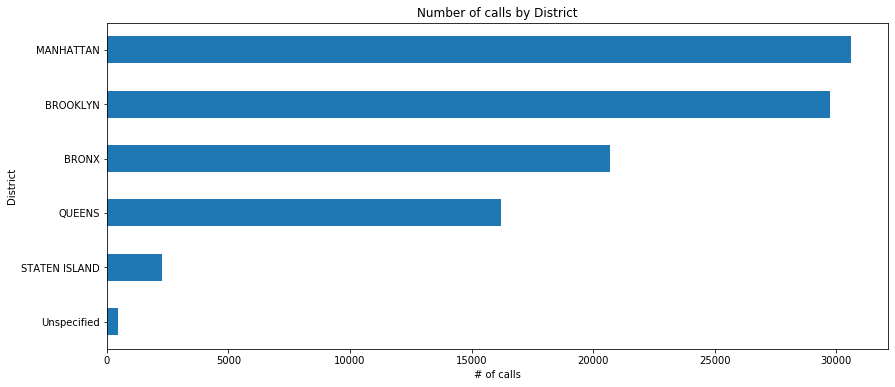

In [47]:
df["Borough"].value_counts(ascending=True).plot(kind="barh", figsize=(14,6), title="Number of calls by District")
plt.xlabel("# of calls")
plt.ylabel("District")
plt.show()


# Let's find out which hours during the day are the busiest ones for the police.

In [0]:
dates_created = pd.to_datetime([date for date in df["Created Date"]]) # converts "Created Date" to DateTime object
hours = dates_created.hour # we grab only the hours from dates_created

In [32]:
print(hours[0:100])

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64')


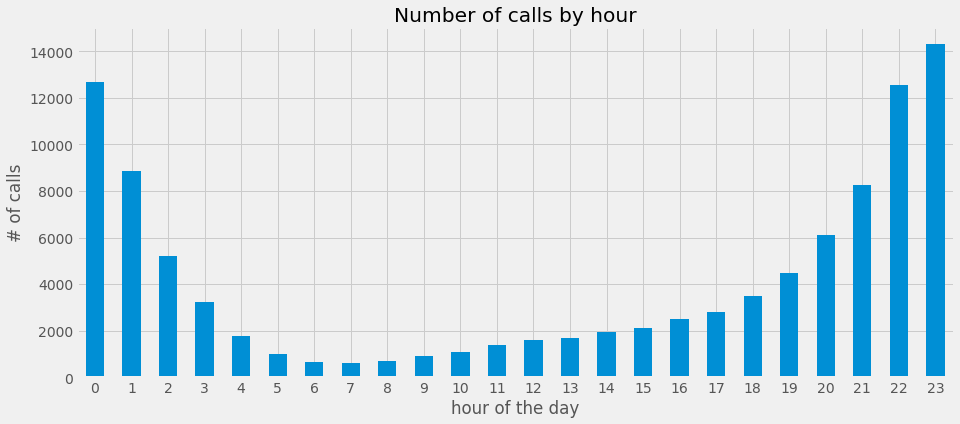

In [54]:
plt.style.use('fivethirtyeight')

hours.value_counts(sort=False).plot(kind="bar", figsize=(14,6), title="Number of calls by hour")
plt.xlabel("hour of the day")
plt.ylabel("# of calls")
plt.xticks(rotation='horizontal')
plt.show()

# And which are the busiest weekdays?

In [0]:
weekdays = dates_created.weekday # grabs only the weekday from DateTime object dates_created

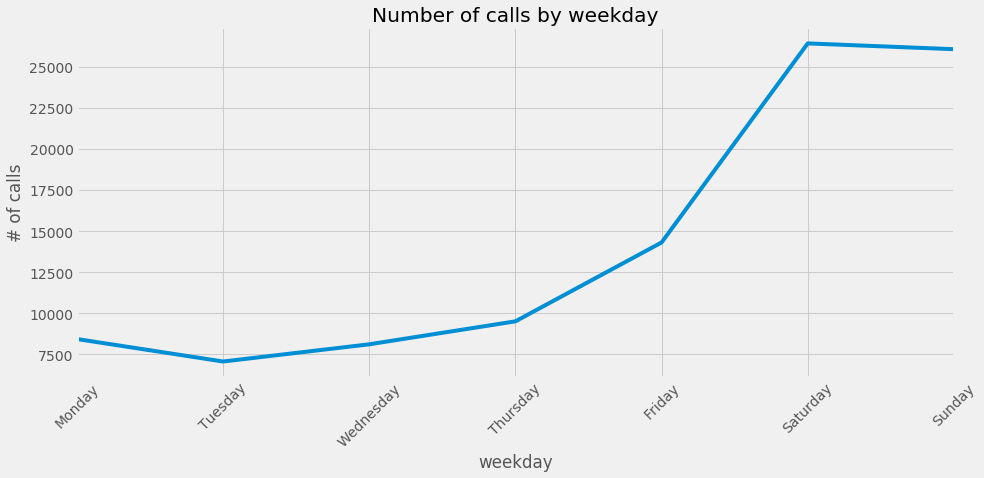

In [63]:
weekdays.value_counts().sort_index().plot(figsize=(14,6),
                                               title='Number of calls by weekday');
days_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
days_numbers = [0,1,2,3,4,5,6]

plt.xlabel("weekday")
plt.ylabel("# of calls")
plt.xticks(days_numbers, days_names, rotation='45')
plt.margins(x=0.02)
plt.show()

## Using Geo Data for creating a scatter plot

In [0]:
plt.style.use('classic')

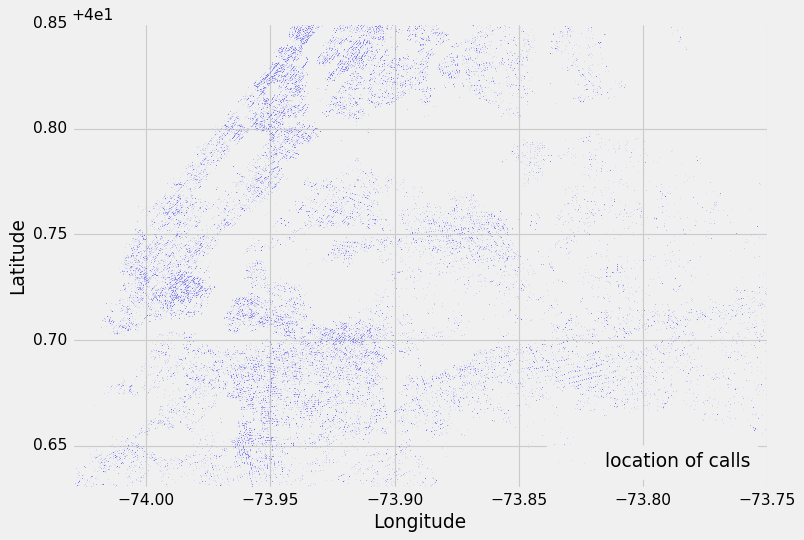

In [106]:
df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=1, alpha=0.1, color="blue", figsize=(10,7), label="location of calls")

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

plt.show()